1. What is unsupervised learning in the context of machine learning?
    -> Unsupervised learning in machine learning refers to training models on data without predefined labels, where the goal is to identify hidden patterns, groupings, or structures within the dataset. It is commonly used in clustering and dimensionality reduction tasks.

2. How does K-Means clustering algorithm work?
    -> K-Means clustering works by initializing K centroids, assigning each data point to the nearest centroid, and then updating the centroids as the mean of assigned points. This process repeats iteratively until cluster assignments stabilize or convergence is reached.

3. Explain the concept of a dendrogram in hierarchical clustering.
    -> A dendrogram in hierarchical clustering is a tree-like diagram that shows how clusters are merged or split at each step of the algorithm. It helps visualize the hierarchy of clusters and decide the optimal number of clusters by cutting the tree at a certain level.

4. What is the main difference between K-Means and Hierarchical Clustering?
    -> The main difference between K-Means and hierarchical clustering is that K-Means requires the number of clusters in advance and partitions data based on centroids, while hierarchical clustering builds a hierarchy of clusters without needing the number beforehand.

5. What are the advantages of DBSCAN over K-Means?
    -> DBSCAN has advantages over K-Means because it can find clusters of arbitrary shapes, does not require the number of clusters in advance, and is more robust to noise by identifying outliers as separate from clusters.

6. When would you use Silhouette Score in clustering?
    -> Silhouette Score is used in clustering to measure how similar a point is to its own cluster compared to other clusters. It helps evaluate clustering quality and determine the optimal number of clusters.

7. What are the limitations of Hierarchical Clustering?
    -> Hierarchical clustering has limitations such as high computational complexity for large datasets, sensitivity to noise and outliers, and the inability to revisit cluster assignments once they are merged or split.

8. Why is feature scaling important in clustering algorithms like K-Means?
    -> Feature scaling is important in K-Means because the algorithm relies on Euclidean distance; without scaling, features with larger ranges dominate the clustering, leading to biased results.

9. How does DBSCAN identify noise points?
    -> DBSCAN identifies noise points as those that do not have enough neighboring points within a defined distance (eps) to be part of a cluster. Such points are labeled as outliers.

10. Define inertia in the context of K-Means.
    -> Inertia in K-Means refers to the sum of squared distances of data points from their assigned cluster centroids. It measures how compact the clusters are, with lower inertia indicating better clustering.

11. What is the elbow method in K-Means clustering?
    -> The elbow method in K-Means involves plotting inertia against the number of clusters and identifying the "elbow point," where the rate of decrease sharply changes, suggesting the optimal number of clusters.
    
12. Describe the concept of "density" in DBSCAN.
    -> In DBSCAN, density refers to the number of points within a specified radius (eps). Clusters are formed in regions of high density, while sparse regions are treated as noise.

13. Can hierarchical clustering be used on categorical data?
    -> Hierarchical clustering can be applied to categorical data using appropriate distance metrics (like Hamming distance) or by encoding categories numerically, though results may be less interpretable than with numerical data.

14. What does a negative Silhouette Score indicate?
    -> A negative Silhouette Score indicates that a point is likely assigned to the wrong cluster, as it is closer to points in another cluster than to those in its own.

15. Explain the term "linkage criteria" in hierarchical clustering.
    -> Linkage criteria in hierarchical clustering determine how distances between clusters are measured, such as single linkage (minimum distance), complete linkage (maximum distance), or average linkage (mean distance).

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
    -> K-Means performs poorly on data with varying cluster sizes or densities because it assumes clusters are spherical, equally sized, and balanced, which leads to misclassification of irregularly shaped clusters.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
    -> The core parameters in DBSCAN are eps (radius for neighborhood search) and minPts (minimum points required to form a dense region). Larger eps merges clusters, while higher minPts makes clusters more selective.

18. How does K-Means++ improve upon standard K-Means initialization?
    -> K-Means++ improves upon standard K-Means by choosing initial centroids more strategically, spreading them apart to reduce the chances of poor clustering and speeding up convergence.

19. What is agglomerative clustering?
    -> Agglomerative clustering is a type of hierarchical clustering that starts with each data point as its own cluster and iteratively merges the closest clusters until all points belong to a single cluster or the desired number is reached.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
    -> Silhouette Score is a better metric than inertia because it accounts for both intra-cluster cohesion and inter-cluster separation, providing a more balanced view of clustering quality rather than just compactness.

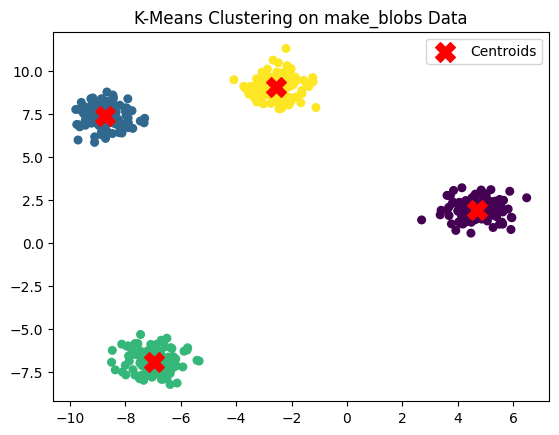

In [1]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.title("K-Means Clustering on make_blobs Data")
plt.show()

In [2]:
# 22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("1st 10 predicted cluster labels : ", labels[:10])

1st 10 predicted cluster labels :  [1 1 1 1 1 1 1 1 1 1]


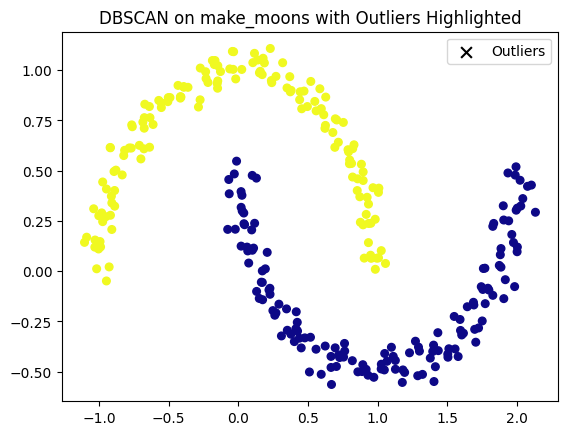

In [3]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Appling DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

outliers = labels == -1

plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='plasma', s=30)
plt.scatter(X[outliers, 0], X[outliers, 1], c='black', marker='x', s=60, label='Outliers')
plt.legend()
plt.title("DBSCAN on make_moons with Outliers Highlighted")
plt.show()

In [4]:
# 24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


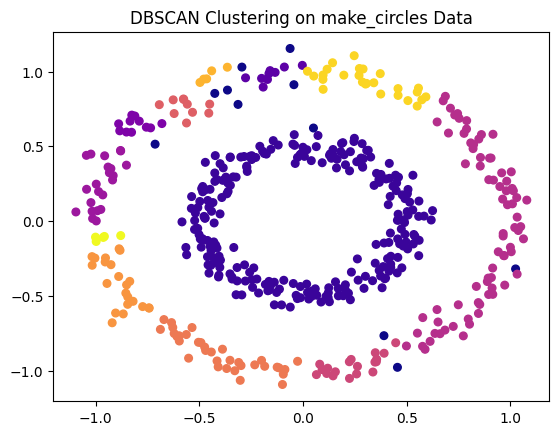

In [5]:
# 25.  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=30)
plt.title("DBSCAN Clustering on make_circles Data")
plt.show()

In [7]:
# 26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_

print("Cluster centroids :\n", centroids)

Cluster centroids :
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


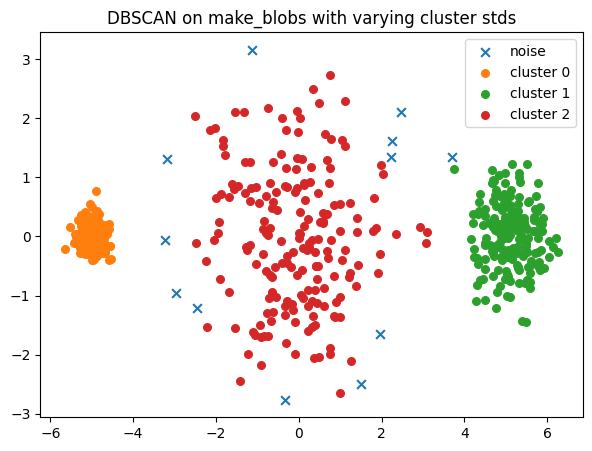

In [8]:
# 27.  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, _ = make_blobs(n_samples=600, centers=[(-5,0),(0,0),(5,0)], cluster_std=[0.2,1.2,0.5], random_state=42)

db = DBSCAN(eps=0.8, min_samples=8)
labels = db.fit_predict(X)

unique_labels = np.unique(labels)
plt.figure(figsize=(7,5))
for lab in unique_labels:
    pts = X[labels == lab]
    if lab == -1:
        plt.scatter(pts[:,0], pts[:,1], marker='x', s=40, label='noise')
    else:
        plt.scatter(pts[:,0], pts[:,1], s=30, label=f'cluster {lab}')
plt.legend()
plt.title("DBSCAN on make_blobs with varying cluster stds")
plt.show()

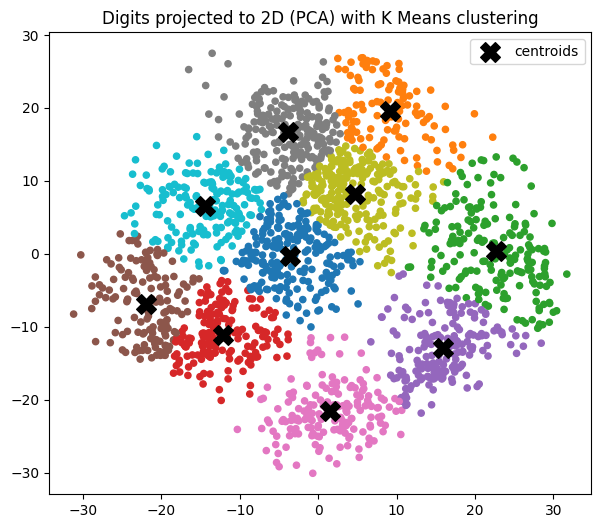

In [9]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X2)
centers = kmeans.cluster_centers_

plt.figure(figsize=(7,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=20, cmap='tab10')
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='black', label='centroids')
plt.title("Digits projected to 2D (PCA) with K Means clustering")
plt.legend()
plt.show()

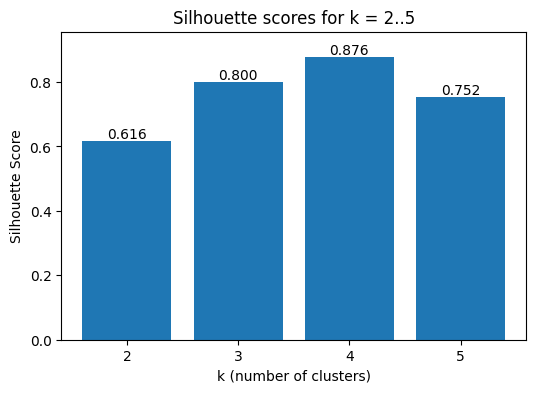

In [10]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=42)

ks = range(2,6)
scores = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    lab = km.fit_predict(X)
    score = silhouette_score(X, lab)
    scores.append(score)

plt.figure(figsize=(6,4))
plt.bar([str(k) for k in ks], scores)
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette scores for k = 2..5")
for i,s in enumerate(scores):
    plt.text(i, s+0.01, f"{s:.3f}", ha='center')
plt.ylim(0, max(scores)+0.08)
plt.show()

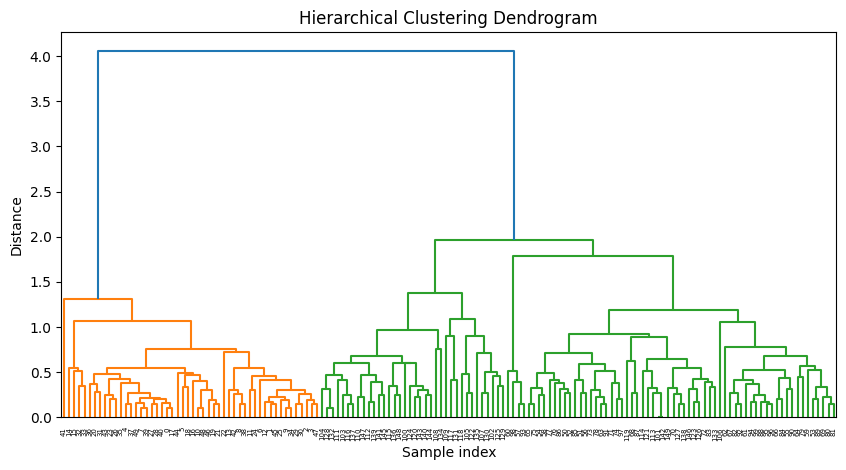

In [12]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

Z = linkage(X, method='average', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, color_threshold=None)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

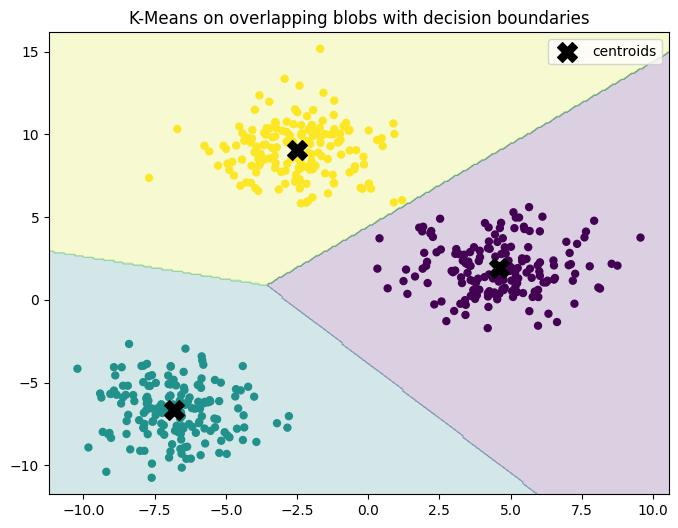

In [13]:
# 31.  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.6, random_state=42)  # overlapping
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=labels, s=25)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='black', label='centroids')
plt.title("K-Means on overlapping blobs with decision boundaries")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


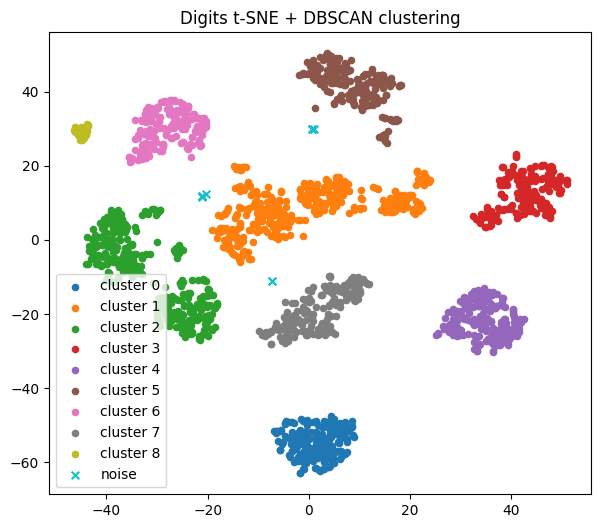

In [14]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X2 = tsne.fit_transform(X)

db = DBSCAN(eps=4.5, min_samples=5)  # eps tuned for t-SNE scale; may need adjustment
labels = db.fit_predict(X2)

plt.figure(figsize=(7,6))
unique = set(labels)
for lab in unique:
    pts = X2[labels == lab]
    if lab == -1:
        plt.scatter(pts[:,0], pts[:,1], marker='x', label='noise', s=30)
    else:
        plt.scatter(pts[:,0], pts[:,1], label=f'cluster {lab}', s=20)
plt.legend()
plt.title("Digits t-SNE + DBSCAN clustering")
plt.show()

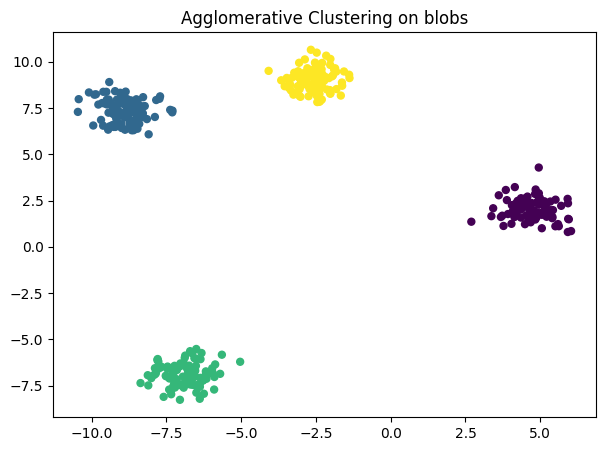

In [15]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=25)
plt.title("Agglomerative Clustering on blobs")
plt.show()

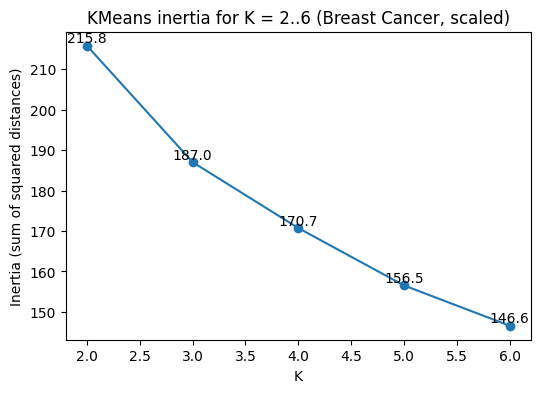

In [16]:
# 34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = data.data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Ks = range(2,7)
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(Ks), inertias, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("KMeans inertia for K = 2..6 (Breast Cancer, scaled)")
for x,y in zip(Ks, inertias):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom')
plt.show()

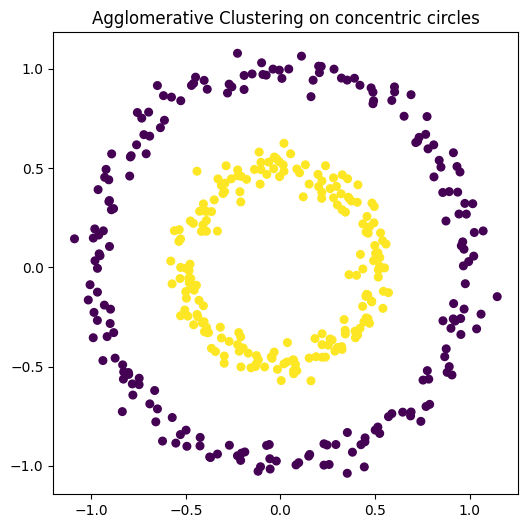

In [17]:
# 35.  Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, s=30)
plt.title("Agglomerative Clustering on concentric circles")
plt.show()

In [18]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.9, min_samples=5)  # eps may be adjusted
labels = db.fit_predict(X_scaled)

unique_labels = set(labels)
n_noise = np.sum(labels == -1)
n_clusters = len([lab for lab in unique_labels if lab != -1])

print("No. of clusters (excluding noise):", n_clusters)
print("No, of noise points:", int(n_noise))
print("Cluster labels present:", sorted(unique_labels))

No. of clusters (excluding noise): 0
No, of noise points: 178
Cluster labels present: [np.int64(-1)]


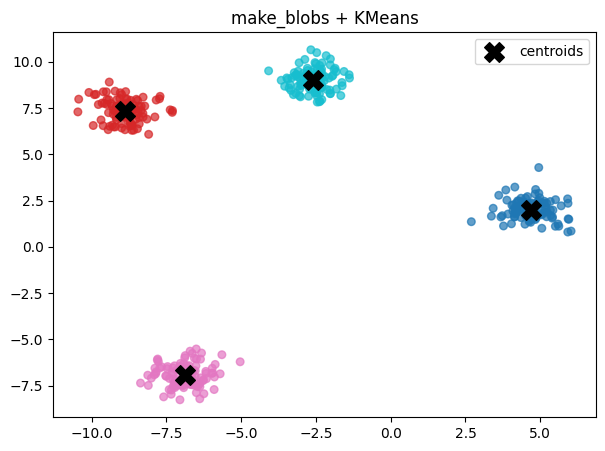

In [19]:
# 37.Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=42)
km = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X)
labels = km.labels_
centers = km.cluster_centers_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='tab10', alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='black', label='centroids')
plt.title("make_blobs + KMeans")
plt.legend()
plt.show()

In [20]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X_scaled)
n_noise = int(np.sum(labels == -1))

print("Num of samples labeled as noise by DBSCAN:", n_noise)
print("Unique labels: ", sorted(set(labels)))

Num of samples labeled as noise by DBSCAN: 26
Unique labels:  [np.int64(-1), np.int64(0), np.int64(1)]


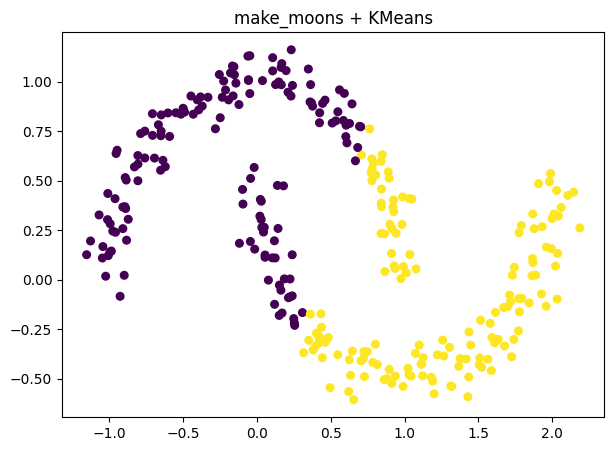

In [21]:
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.07, random_state=42)
km = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)
labels = km.labels_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("make_moons + KMeans")
plt.show()

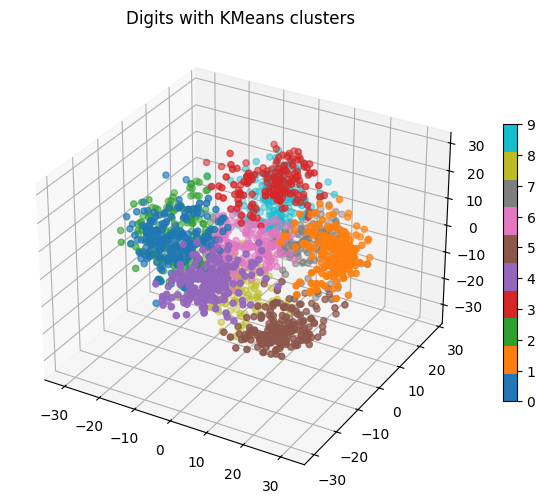

In [22]:
# 40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
pca = PCA(n_components=3, random_state=42)
X3 = pca.fit_transform(X)

km = KMeans(n_clusters=10, random_state=42, n_init=10).fit(X3)
labels = km.labels_

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=labels, s=20, cmap='tab10')
ax.set_title("Digits with KMeans clusters")
plt.colorbar(sc, ax=ax, shrink=0.6)
plt.show()

In [23]:
# 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)
km = KMeans(n_clusters=5, random_state=42, n_init=10).fit(X)
labels = km.labels_
score = silhouette_score(X, labels)

print("Silhouette score for KMeans: ", round(score, 4))

Silhouette score for KMeans:  0.7993


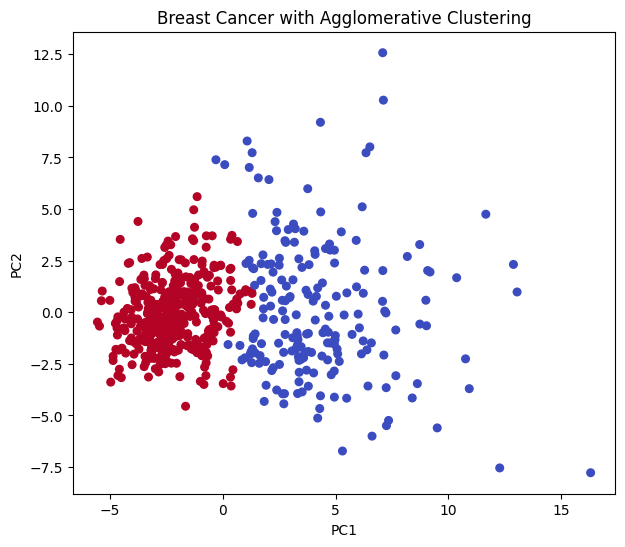

In [24]:
# 42.  Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = data.data
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg.fit_predict(X2)

plt.figure(figsize=(7,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=30, cmap='coolwarm')
plt.title("Breast Cancer with Agglomerative Clustering")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

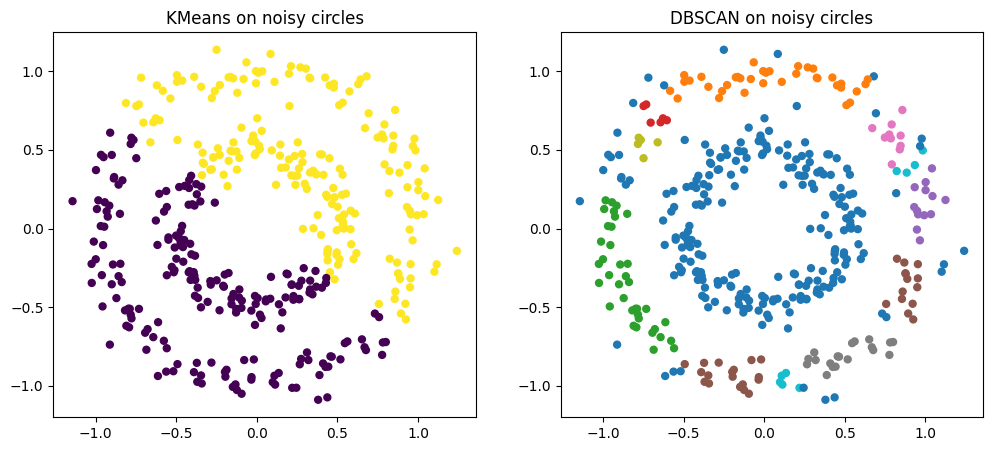

In [25]:
# 43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.08, random_state=42)

km = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)
db = DBSCAN(eps=0.12, min_samples=5).fit(X)

fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].scatter(X[:,0], X[:,1], c=km.labels_, s=25)
axs[0].set_title("KMeans on noisy circles")
axs[1].scatter(X[:,0], X[:,1], c=db.labels_, s=25, cmap='tab10')
axs[1].set_title("DBSCAN on noisy circles")
plt.show()

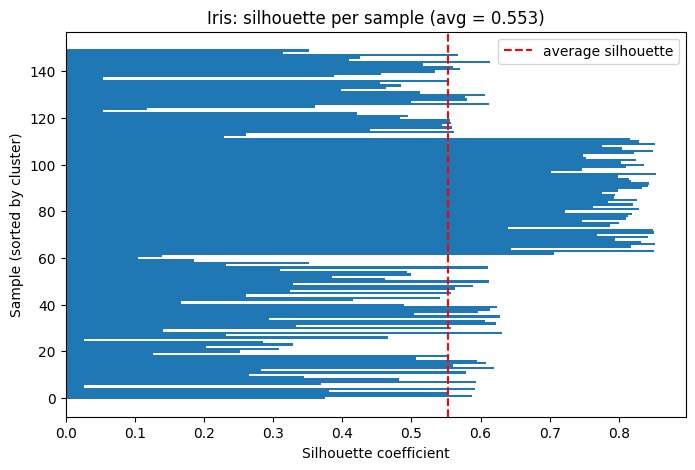

In [26]:
# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
X = iris.data

km = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
labels = km.labels_
s_vals = silhouette_samples(X, labels)
avg = silhouette_score(X, labels)

order = np.argsort(labels)
s_sorted = s_vals[order]
labels_sorted = labels[order]

plt.figure(figsize=(8,5))
y_pos = np.arange(len(s_sorted))
plt.barh(y_pos, s_sorted, height=1.0)
plt.xlabel("Silhouette coefficient")
plt.ylabel("Sample (sorted by cluster)")
plt.title(f"Iris: silhouette per sample (avg = {avg:.3f})")
plt.axvline(x=avg, color='red', linestyle='--', label='average silhouette')
plt.legend()
plt.show()

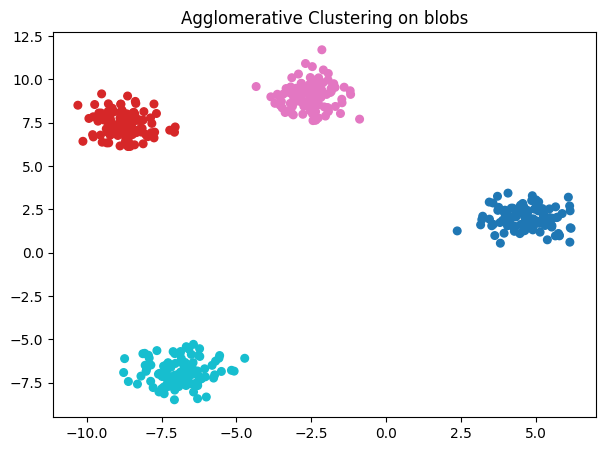

In [27]:
# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

X, _ = make_blobs(n_samples=450, centers=4, cluster_std=0.7, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='tab10')
plt.title("Agglomerative Clustering on blobs")
plt.show()

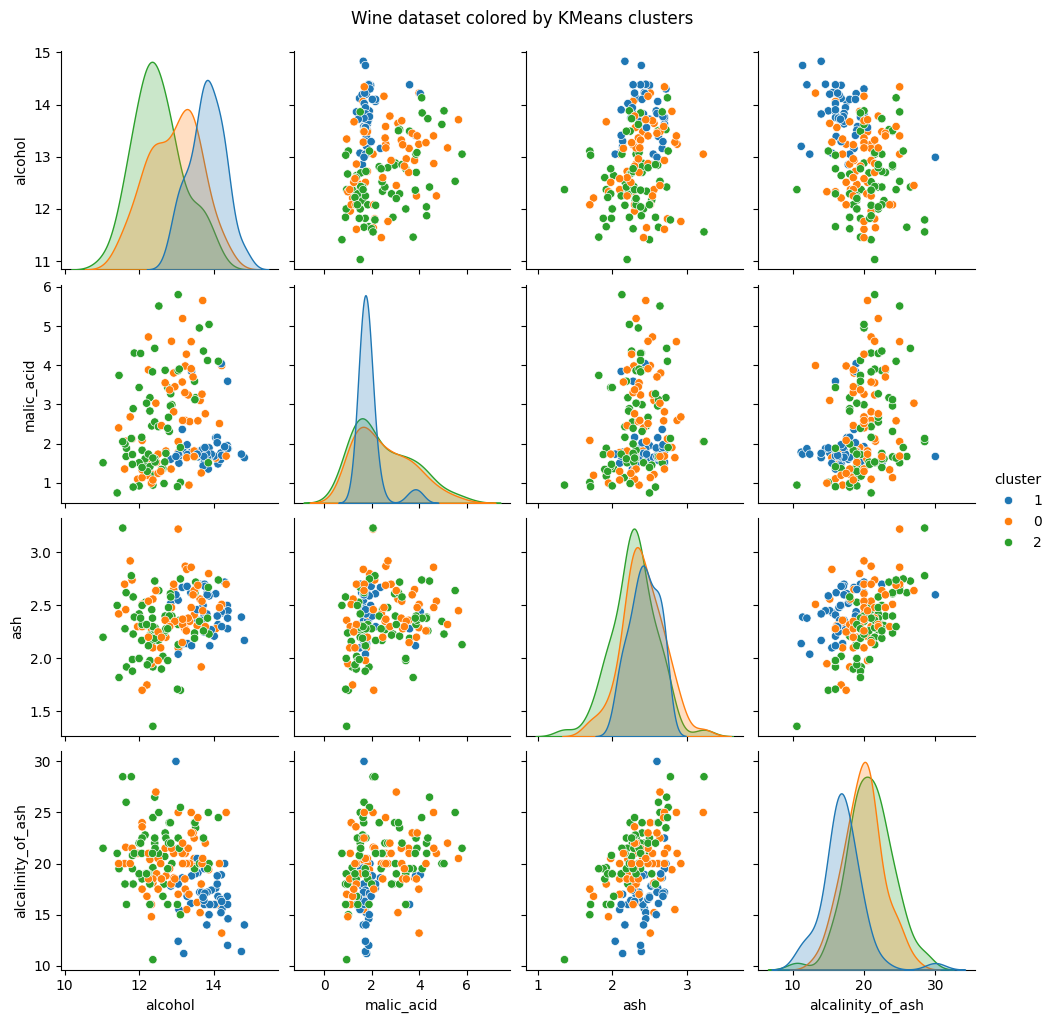

In [30]:
# 46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

wine = load_wine()
X = wine.data
cols = wine.feature_names[:4]  # first 4 features

km = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
labels = km.labels_

df = pd.DataFrame(X[:, :4], columns=cols)
df['cluster'] = labels.astype(str)

sns.pairplot(df, hue='cluster', diag_kind='kde', corner=False)
plt.suptitle("Wine dataset colored by KMeans clusters", y=1.02)
plt.show()

In [31]:
# 47.  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=600, centers=4, cluster_std=[0.3, 1.2, 0.6, 0.9], random_state=42)
db = DBSCAN(eps=0.8, min_samples=6)
labels = db.fit_predict(X)

unique = set(labels)
n_clusters = len([lab for lab in unique if lab != -1])
n_noise = int(np.sum(labels == -1))

print("Detected clusters: ", n_clusters)
print("Number of noise points: ", n_noise)
print("Labels present: ", sorted(unique))

Detected clusters:  4
Number of noise points:  13
Labels present:  [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


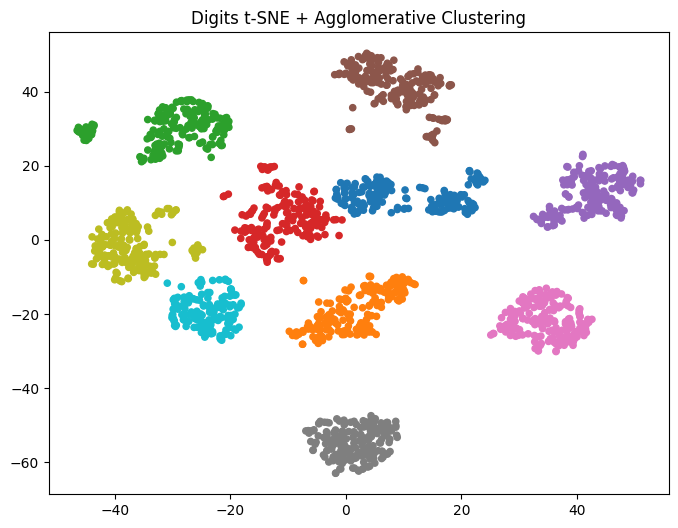

In [32]:
# 48.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digs = load_digits()
X = digs.data

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X2 = tsne.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(X2)

plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=20, cmap='tab10')
plt.title("Digits t-SNE + Agglomerative Clustering")
plt.show()